# Franchir les frontières académiques : analyse des flux de mobilité des étudiants entrant dans l'enseignement supérieur

Ce projet a été réalisé dans le cadre du cours de 2ème année de l'ENSAE "Python pour la data science" par Mathieu CAMBON, Charlotte HIECQUE et Elise MENSCH. 

## Sommaire
1. [Introduction](#intro)
2. [Préparation des données](#donnees)
3. [Statistiques descriptives](#statsdesc)
    - [Disparités géographiques](#geo)
    - [Clivage public/privé](#public_prive)
    - [Excellence](#excellence)
    - [Genre](#genre)
    - [Sélectivité](#selectivite)
4. [Modélisation](#modelisation)
5. [Conclusion](#conclu)

<a id="intro"></a>
## Introduction

### Contexte
La plateforme Parcoursup affecte chaque année des milliers d'étudiants à une formation. Les formations sont nombreuses, et même si certaines ont le même objectif, chacune possède une identité propre pouvant inciter un étudiant à postuler à une formation plutôt qu'une autre, engendrant ainsi une certaine mobilité des étudiants. Pourtant, cette mobilité peut être contrainte par de nombreux facteurs. De plus, elle est inégalement répartie sur le territoire, avec certaines villes qui attirent un grand nombre de personnes tandis que d'autres engendrent une fuite des étudiants, qui se dirigent vers d'autres académies dans le cadre de leurs études supérieures. Il apparaît donc intéressant d'étudier la mobilité des étudiants lors de leur entrée en étude supérieure. Analyse de Parcoursup comme moteur de mobilité territoriale au lieu de l'orientation; 

### Problématique 
Quels sont les facteurs qui encouragent une mobilité lors de l'entrée dans l'éducation supérieure ? 

De manière plus précise, nous allons analyser les mécanismes suivants : 
- La géographie des flux : quels sont les académies qui attirent les étudiants et celles qui, au contraire les repoussent ?
- La mobilité comme une stratégie pour accéder aux formations d'excellence;
- L'offre de formation, notamment la sélectivité et le statut.

### Données
Pour effectuer cette analyse, nous avons principalement utilisé les données parcoursup en opendata sur data.gouv. A partir de cette base que nous avons nettoyé, nous avons créé de nouvelles données afin d'enrichir notre analyse. 

### Plan

<a id="donnees"></a>## Importation des bases de données et nettoyage

### Importation des librairies nécessaires

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Nettoyage et enrichissement de la base de données

In [3]:
%load_ext autoreload
%autoreload 2

from function import charger_donnees

url_parcoursup2024 = "https://www.data.gouv.fr/api/1/datasets/r/1d916b7c-bd4c-4951-845a-70f7ad7c17db"

df=charger_donnees(url_parcoursup2024)

Chargement du fichier...
Succès 14079 lignes prêtes


<a id="statdescr"></a>
## Statistiques descriptives

<a id="geo"></a>
### Analyse géographique : quels sont les pôles d'attractivité ?

Nous observons tout d'abord les flux entre académies, qui sont les seules données auxquelles nous avons accès en terme de flux. 

Pour éviter des biais pouvant être lié à des caractéristiques propres à l'Ile-de-France, notamment des flux entre les différents départements, nous créons une nouvelle variable qui regroupe les académies de Paris, Créteil et Versailles. 

In [4]:
# Création d'une copie du data frame, spécifique à cette analyse
df_geo = df

# Regroupement de Paris, Créteil et Versailles
df_geo["academie_pcv"] = df_geo["academie"].replace(
    ["Paris", "Créteil", "Versailles"], "Paris-Créteil-Versailles"
)

On calcule ensuite différents indicateurs. 
En regroupant par académie, on calcule le pourcentage de locaux en moyenne.

In [5]:
academies = df_geo.groupby("academie_pcv")["part_bac_ac_pcv"].mean().reset_index()

In [6]:
display(academies.style.background_gradient(cmap="viridis", subset=["part_bac_ac_pcv"]))

,academie_pcv,part_bac_ac_pcv
0,Aix-Marseille,75.592282
1,Amiens,75.747634
2,Besancon,70.237154
3,Bordeaux,70.990369
4,Clermont-Ferrand,61.942857
5,Corse,77.081081
6,Dijon,67.071642
7,Etranger,44.294118
8,Grenoble,73.972835
9,Guadeloupe,89.676923


Passons maintenant à la visualisation graphique.

/tmp/ipykernel_12426/597566750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


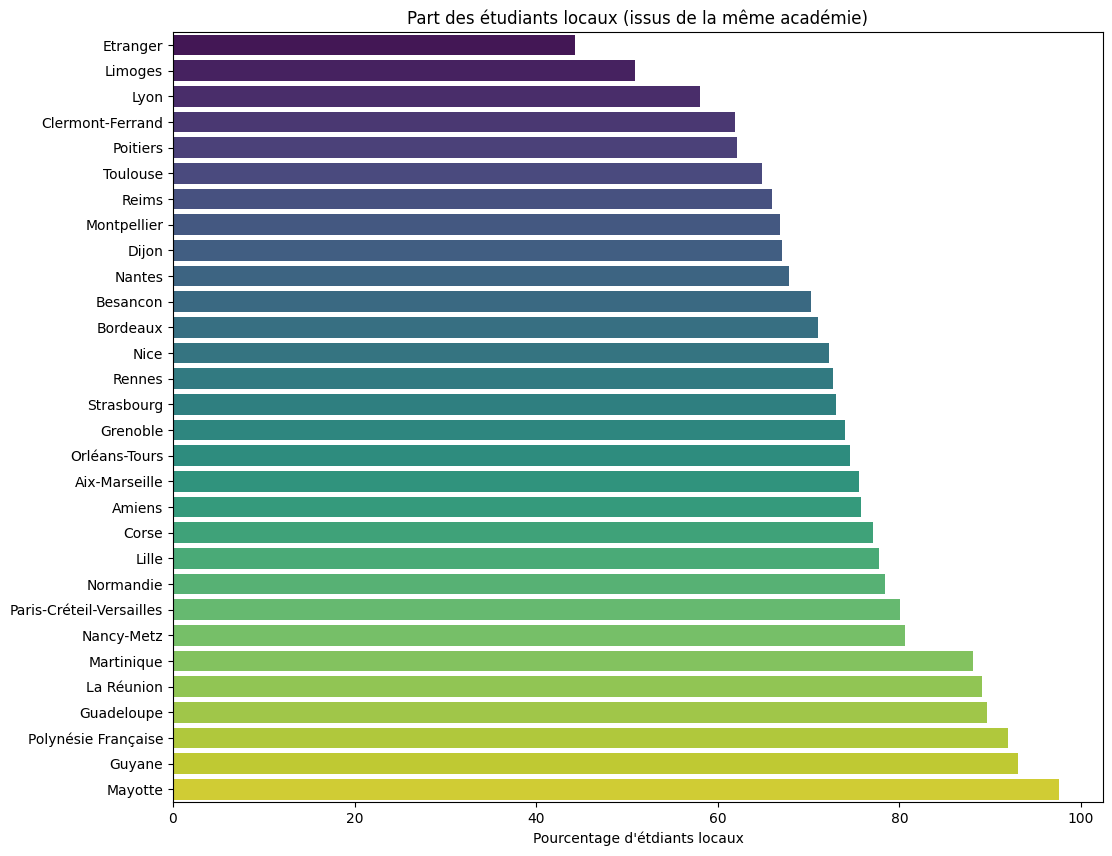

In [7]:
academies = academies.sort_values(by = "part_bac_ac_pcv", ascending=True)

plt.figure(figsize=(12,10))
sns.barplot(
    data=academies,
    x="part_bac_ac_pcv",
    y="academie_pcv",
    palette="viridis",
)

plt.title("Part des étudiants locaux (issus de la même académie)")
plt.xlabel("Pourcentage d'étdiants locaux")
plt.ylabel("")
plt.show()

On calcule cette fois-ci le taux d'entrant.

In [8]:
academies["taux_entrants"] = 100 - academies["part_bac_ac_pcv"]

#tri pour connaître les académies les plus attractives
academies=academies.sort_values(by="taux_entrants", ascending=True)

/tmp/ipykernel_12426/3091903523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


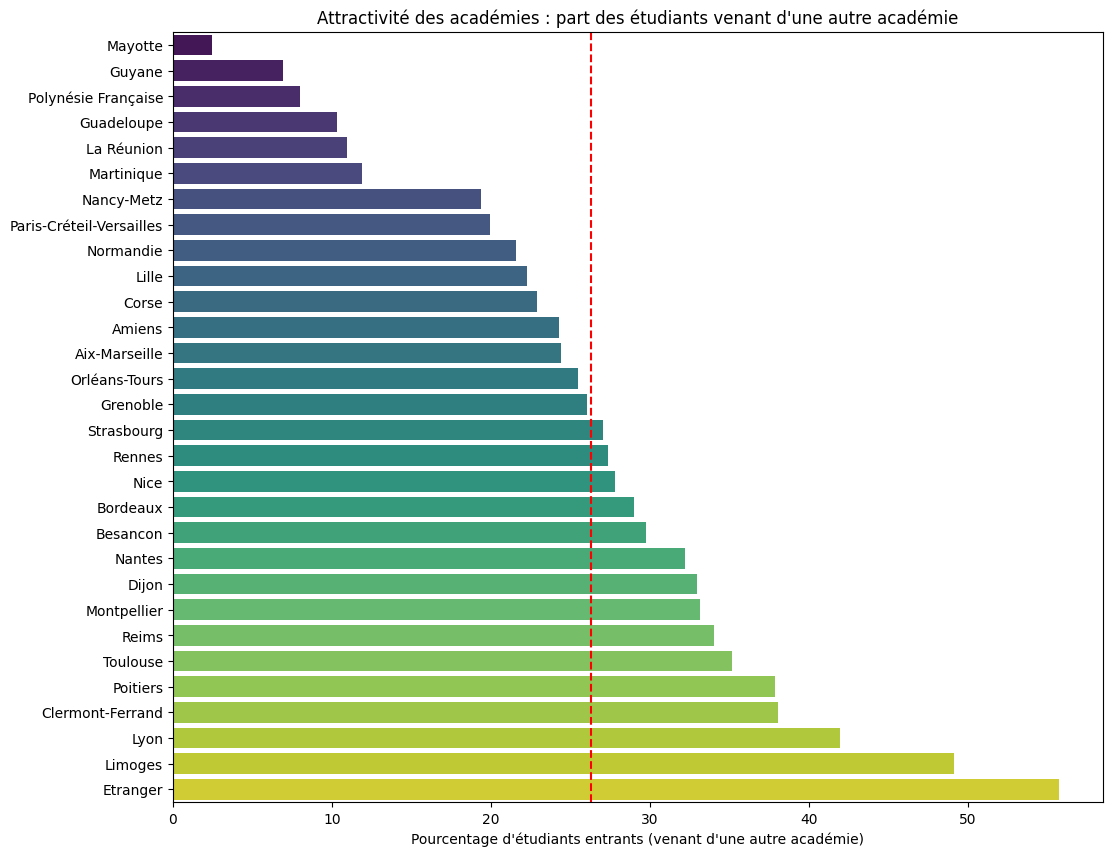

In [9]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=academies,
    x="taux_entrants",
    y="academie_pcv",
    palette="viridis"
)

plt.title("Attractivité des académies : part des étudiants venant d'une autre académie")
plt.xlabel("Pourcentage d'étudiants entrants (venant d'une autre académie)")
plt.ylabel("")

moyenne_nationale = academies["taux_entrants"].mean()
plt.axvline(x=moyenne_nationale, color="red", linestyle="--", label = f"Moyenne nationale ({moyenne_nationale:.1f}%)")

Ces deux graphiques, qui sont complémentaires (de façon logique), montre des disparités géographiques concernant la mobilité des étudiants selon les régions. 

On peut s'intéresser tout d'abord à l'Ile-de-France, souvent considérée comme un espace attractif pour les étudiants, en raison du nombre de formations. On observe ici un pourcentage assez faible de 20% d'entrants, fortement inférieur à la moyenne nationale d'environ 26%. Cela pourrait indiquer une sorte d'autosuffisance du bassin parisien. Ainsi, les franciliens restent dans leurs académies grâce à la grande diversité et densité des formations. Cependant ce chiffre peut masquer une importante mobilité interne entre ces trois académies. => *ça pourrait peut valoir le coup de l'étudier un peu plus en détail ?*

En mettant de côté l'étranger qui est un cas vraiment à part, on remarque que trois des quatre académies avec le plus d'étudiants non locaux, Limoges, Clermont-Ferrand, Poitiers sont situés au centre de la France, dans des environnements démographiques peu dynamiques et sont des capitales régionales un peu isolées graphiquement. Ainsi, elles doivent nécessairement recruter en dehors de leurs académies pour maintenir leurs formations et peuvent ainsi bénéficier la saturation d'autres métropoles. De part leur histoire, ce sont des académies avec une grande diversité de formations. *Ce sont peut être aussi des endroits avec un nombre plus important de formations, par exemple que Amiens ?*
Dans ce groupe, Lyon fait figure d'exception. On peut supposer que cette métropole est particulièrement attractive, notamment pour les étudiants des grandes villes voisines. 

Le cas des outre-mers quant à lui est assez prévisible. En effet, étant marginalisés géographiquement, il s'ensuit que leur recrutement est particulièrement local. 

Enfin, les villes proches de la moyenne nationale, Nantes, Bordeaux, Rennes cumulent un nombre important de bacheliers ainsi qu'une offre de formation dynamique. Ainsi, il existe une mobilité choisie des étudiants. *Regarder le nombre de bacheliers par académie voir si ça colle ?*

Ainsi, la mobilité n'est pas uniforme sur l'ensemble du territoire. Elle semble dépendre principalement de la tension entre l'offre de formation et la démographie locale. *A enquêter plus en détail ?*

Pour en savoir plus sur le lien entre l'offre de formation et la mobilité dans les académies, nous rechercher une corrélation entre la taille de l'académie (du point de vue du nombre d'étudiants qu'elle recrute chaque année) et la proportion d'étudiants locaux. 

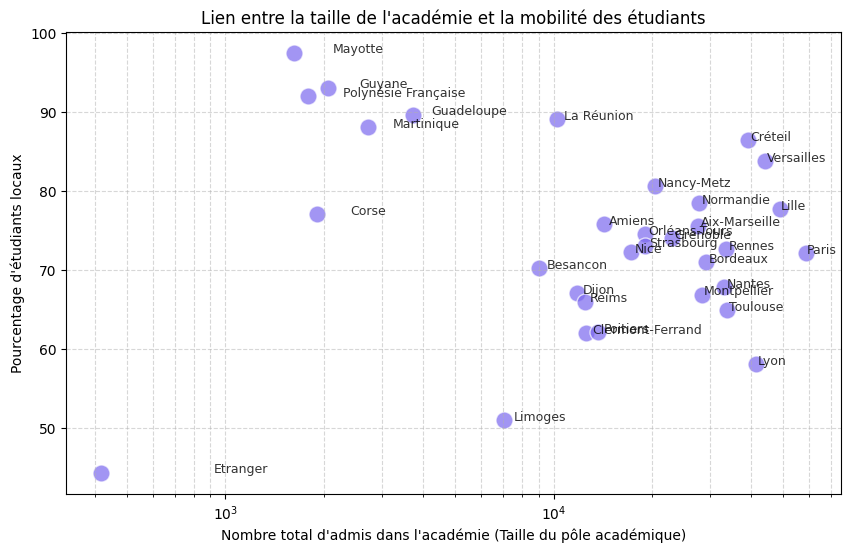

In [10]:
# Corrélation entre démographie mobilité

# Agglomération des données par académie
acad_stats = df.groupby("academie").agg({
    "nb_admis": "sum",             # Taille de l'académie (Nombre total d'étudiants)
    "part_bac_ac_pcv": "mean"      # Taux moyen de locaux
}).reset_index()

# Visualisation
plt.figure(figsize=(10, 6))

# Nuage de points
sns.scatterplot(
    data=acad_stats,
    x="nb_admis",
    y="part_bac_ac_pcv",
    s=150, 
    color="mediumslateblue",
    alpha=0.7
)

# Ajoute des noms des académies
for i in range(acad_stats.shape[0]):
    plt.text(
        x=acad_stats.nb_admis[i]+500, 
        y=acad_stats.part_bac_ac_pcv[i], 
        s=acad_stats.academie[i], 
        fontdict=dict(color='black', size=9),
        alpha=0.8
    )

plt.title("Lien entre la taille de l'académie et la mobilité des étudiants")
plt.xlabel("Nombre total d'admis dans l'académie (Taille du pôle académique)")
plt.ylabel("Pourcentage d'étudiants locaux")
plt.xscale("log") # Échelle log car Paris/Lille sont énormes par rapport à la Corse
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()

Ce graphique permet de croiser la taille de l'académie (en nombre d'admis) en abscisse et son taux de recrutement local en ordonnée. La relation qui en résulte n'est pas linéaire, incitant à réfuter l'idée que plus une académie est grande, plus elle recrute localement. 

On observe en effet une courbe en U, permettant de dégager trois profils :

A gauche, on observe des académies de petite taille, avec un fort pourcentage d'étudiants locaux, qui s'explique principalement par leur insularité géographique. 

Au centre, on observe des académies de taille moyenne avec une ouverture importante, par exemple Limoges, Clermont-Ferrand, Reims... Ici, la cause semble être structurelle : historiquement elles ont une offre de formation et sont obligées de recruter à l'extérieur pour la remplir. 

Enfin, à partir d'un certain nombre d'admis, la courbe remonte, semblant montrer que ces académies s'autosuffisent. Ce sont particulièrement des métropoles. 

<a id="excellence"></a>
### Excellence scolaire: qui sont les élèves mobiles ?

On pourrait s'intéresser à l'effet de "brain drain" ou fuite des cerveaux, qui pourrait encourage les meilleurs élèves à quitter leur académie pour accéder aux filières les plus prestigieuses. 

Pour visualiser cela, nous croisons le type de filière avec niveau d'excellence de la formation, qui est calculé à partir de la part d'étudiant ayant eu une mention très bien au bac. 

/tmp/ipykernel_12426/1989462573.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_excellence = df.pivot_table(


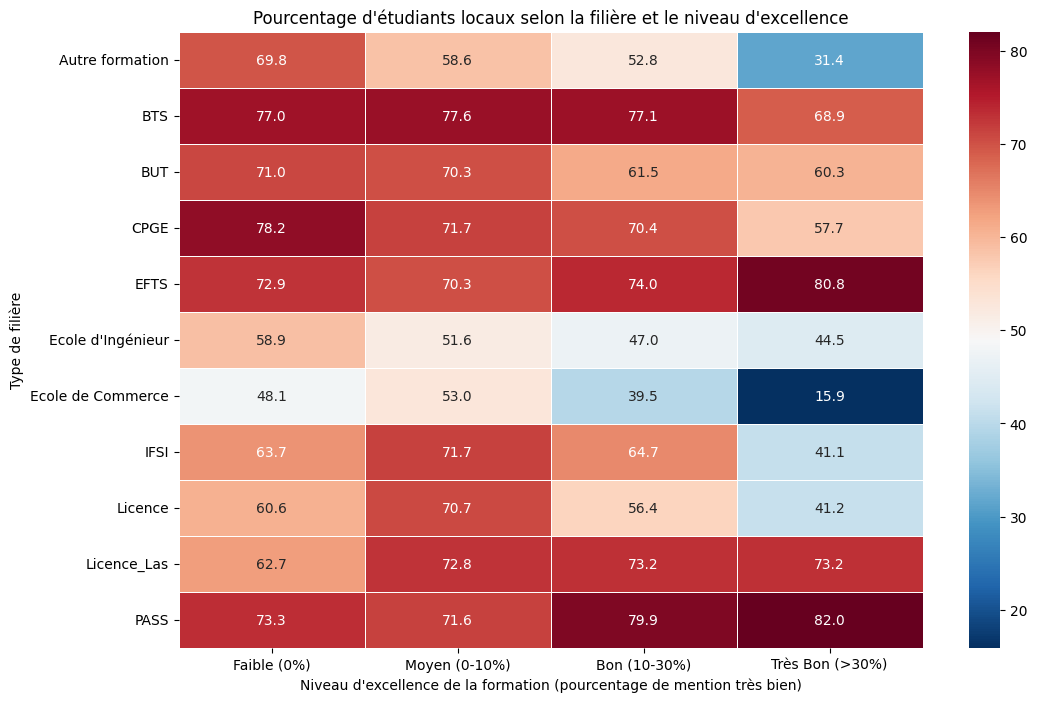

In [11]:
pivot_excellence = df.pivot_table(
    index="filiere_agr",
    columns="niveau_formation",
    values="part_bac_ac",
    aggfunc="mean"
)

plt.figure(figsize=(12,8))

sns.heatmap(
    pivot_excellence,
    annot=True,
    fmt=".1f",
    cmap="RdBu_r",
    linewidths=.5
)

plt.title("Pourcentage d'étudiants locaux selon la filière et le niveau d'excellence")
plt.xlabel("Niveau d'excellence de la formation (pourcentage de mention très bien)")
plt.ylabel("Type de filière")

plt.show()

Cette heatmap révèle un mécanisme de ségrégation spatiale selon le niveau de la filière. 

Les couleurs sont différentes selon les formations. En effet, les BTS, EFTS ou PASS restent globalement très rouge, peu importe le niveau, contrairement à des filières comme des BUT, des CPGE, des licence ou des IFSI. Ainsi, certaines formations sont des formations plutôt de proximité tandis que d'autres recrutent plus large.

Cependant, on remarque que, la PASS, LAS et les EFTS mis à part, plus le niveau de la formation augmente, plus la couleur s'éclaircie. 

On essaie d'enquêter plus en détail le rôle de la filière dans la mobilité.

/tmp/ipykernel_12426/1972848811.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


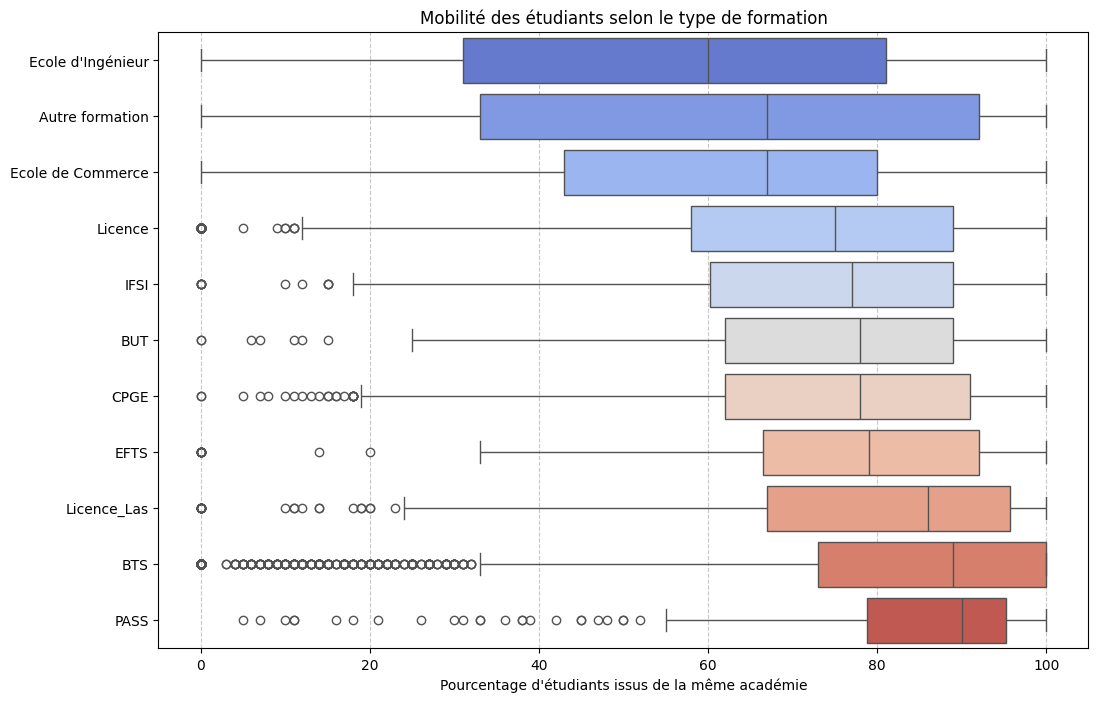

In [12]:
# Role de la filière dans la mobilité

plt.figure(figsize=(12, 8))

# Tri des filières de la "Plus Mobile" (en haut) à la "Plus Locale" (en bas) en utilisant la médiane pour être robuste aux valeurs extrêmes
ordre_filieres = df.groupby("filiere_agr")["part_bac_ac_pcv"].median().sort_values().index

# 2. Le Boxplot
sns.boxplot(
    data=df,
    x="part_bac_ac_pcv", # Taux de locaux
    y="filiere_agr",     # Type de filière
    order=ordre_filieres,
    palette="coolwarm" # Rouge = Local, Bleu = Mobile
)

plt.title("Mobilité des étudiants selon le type de formation")
plt.xlabel("Pourcentage d'étudiants issus de la même académie")
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

On suppose qu'en France la filière en tant que telle est déjà un indicateur du niveau scolaire, ce qui peut être discuté. En effet, les meilleurs élèves suivent souvent des études longues (CPG, école d'ingénieur et de commerce) tandis que ceux qui sont plus en difficultés se dirigent vers des formations courtes, type BTS. 

Cette analyse par filière confirme une segmentation du marché de l'enseignement supérieur. On observe ainsi une corrélation entre le caractère élitiste de la formation et la mobilité des étudiants. Ainsi, les filières élitistes (écoles d'ingénieur, de commerce, CPGE) affichent un taux de recrutement local plutôt faible. A l'inverse, des filières professionnalisantes courtes, comme les BTS, recrutent majoritairement des étudiants locaux. Cela pourrait s'expliquer par le fait que le BTS peut répondre aux besoins d'un bassin d'emploi local, encourageant donc un ancrage territorial. 

Cependant, il y a des nuances importantes au sein de chaque catégorie. En effet, dans le cas des BTS, même si la norme apparaît être un ancrage local, la présence d'un nombre important de valeurs extrêmes suggère l'existence de BTS de niche ou très réputés, rares sur le territoire qui incitent donc à une grande mobilité. Il en va de même concernant les CPGE, ce qui peut illustrer une fracture entre les classes préparatoires de proximité, qui recrutent dans leur académie, et les grandes prépas (qui bénéficient souvent d'un internant, encourageant la mobilité) qui attirent de toute la France. 

Concernant les licences, la règle par défaut est souvent l'université de secteur, ce qui explique une médiane assez élevée. Mais la taille de la boîte étant assez importante pourrait laisser penser à l'existence d'un certain type de licence qui attirerait les étudiants de loin (double licences ou licences prestigieuses) et échapperaient donc à la sectorisation.

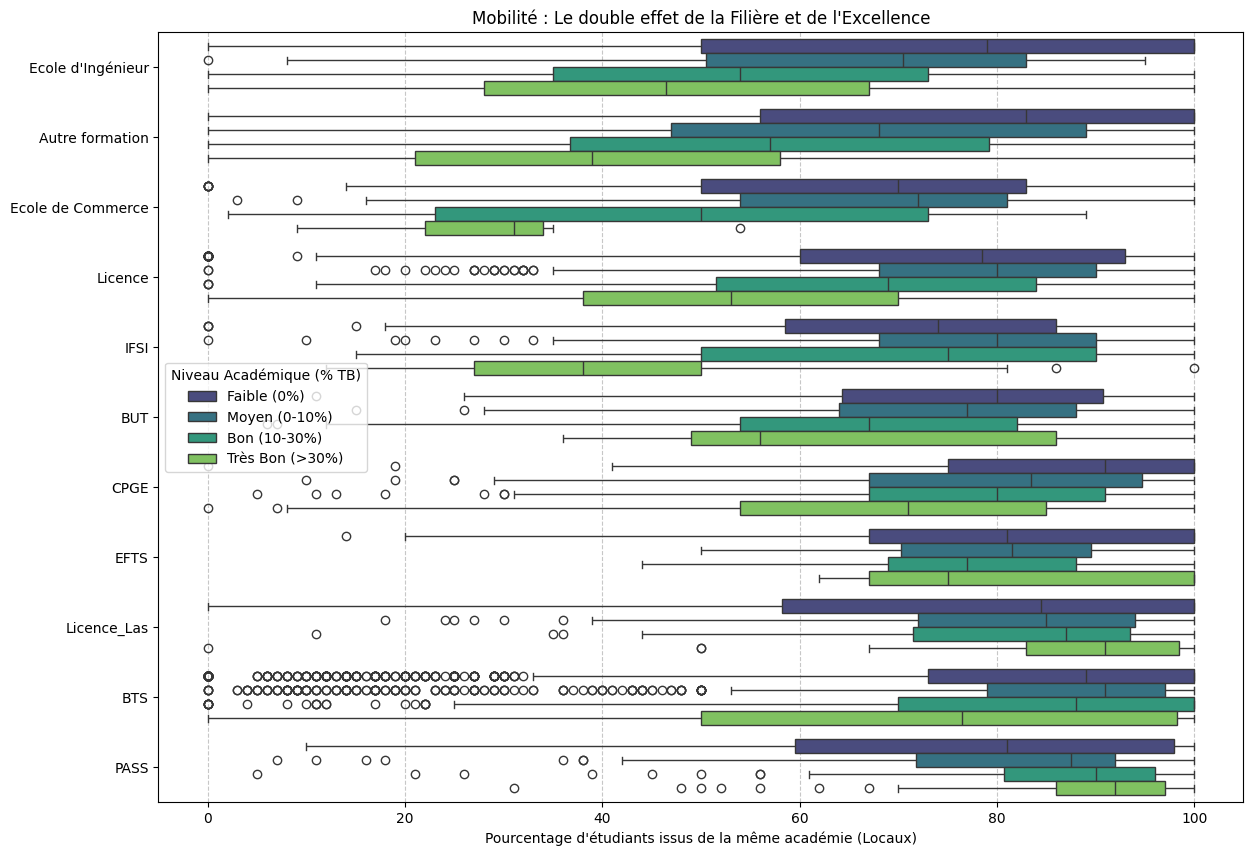

In [13]:

plt.figure(figsize=(14, 10))

#Tri des filières
ordre_filieres = df.groupby("filiere_agr")["part_bac_ac_pcv"].median().sort_values().index

# Boxplot avec la dimension Excellence (hue)
sns.boxplot(
    data=df,
    x="part_bac_ac_pcv", 
    y="filiere_agr",     
    hue="niveau_formation", 
    order=ordre_filieres,
    palette="viridis" # Une couleur par niveau d'excellence
)

plt.title("Mobilité : Le double effet de la Filière et de l'Excellence")
plt.xlabel("Pourcentage d'étudiants issus de la même académie (Locaux)")
plt.ylabel("")
plt.legend(title="Niveau Académique (% TB)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

Ce graphique confirme notre intuition précédente. En effet, on voit, quasiment pour toutes les filières que le pourcentage d'étudiants locaux (en regardant la médiane par exemple) est plus faible dans les très bonne formations. 
Concentrons nous sur le cas des CPGE. On observe que la médiane des prépas au niveau académique le plus faible est très haute, par rapport à celle des meilleures CPGE, qui sont donc attractives à un niveau national. 
Concernant les BTS, on observe toujours un nombre important de valeurs extrêmes vers des formations qui ont une part de locaux assez faible, indiquant une réalité plus complexe que simplement un recrutement local. Ces recrutements ont l'air de non pas s'expliquer par le prestige de la formation mais peut être par la rareté de la spécialité, contraignant donc à recruter des étudiants sur l'ensemble du territoire. 

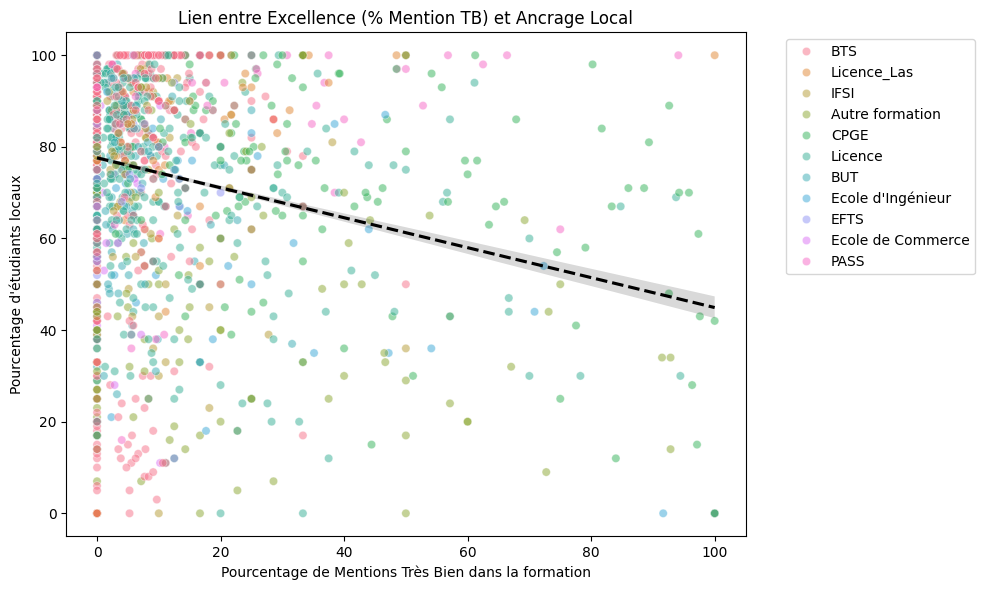

In [14]:
# Preuve qu'il existe une corrélisation entre le niveau de la formation (nombre de mention TB) et mobilité

plt.figure(figsize=(10, 6))

# On prend un échantillon pour ne pas surcharger le graphique
sample_df = df.sample(2000, random_state=42)

sns.scatterplot(
    data=sample_df,
    x="tb_eleves",       # % de mention TB
    y="part_bac_ac_pcv", # % de locaux
    hue="filiere_agr",   # Une couleur par filière pour voir les groupes
    alpha=0.5
)

# On ajoute la courbe de tendance globale (Régression)
sns.regplot(
    data=df, 
    x="tb_eleves", 
    y="part_bac_ac_pcv", 
    scatter=False, 
    color="black", 
    line_kws={"linestyle": "--"}
)

plt.title("Lien entre Excellence (% Mention TB) et Ancrage Local")
plt.xlabel("Pourcentage de Mentions Très Bien dans la formation")
plt.ylabel("Pourcentage d'étudiants locaux")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Ici, on observe une corrélation négative entre le niveau d'excellence académique (pourcentage d'étudiants ayant eu une mention très bien) et le pourcentage d'étudiants locaux. Il tend donc à valider l'hypothèse selon laquelle la mobilité dépend du niveau scolaire. On peut effectuer deux analyses complémentaires : 
- L'excellence scolaire (avoir une mention très bien au bac) permet à l'étudiant une certaine mobilité puisqu'il peut postuler aux formations prestigieuses dans toute la France.
- De plus, les formation situées tout à droite du graphique sont sûrement des formations prestigieuses, qui cherchent donc les meilleurs profils et ne s'arrêtent donc pas à un recrutement local. 
Ainsi, on observe une dualité sur le marché de l'éducation : d'un côté les formation en haut à gauche, sûrement généralistes, qui recrutent plutôt localement et celui des formations en bas à droite, très prestigieuses qui recrutent sur l'ensemble du territoire national. 

Ainsi, si l'excellence scolaire des étudiants favorisent leur mobilité, c'est parce qu'elle leur ouvre les portes des formations les plus prestigieuses. Nous pouvons donc nous intéresser maintenant sur le rôle de la sélectivité de la formation (difficulté d'accès) sur le recrutement local ou national.

<a id="public_prive"></a> ### Le clivage public/privé 

On peut se demander si le statut de l'établissement joue un rôle dans son ouverture géographique.

/tmp/ipykernel_12426/2115162710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


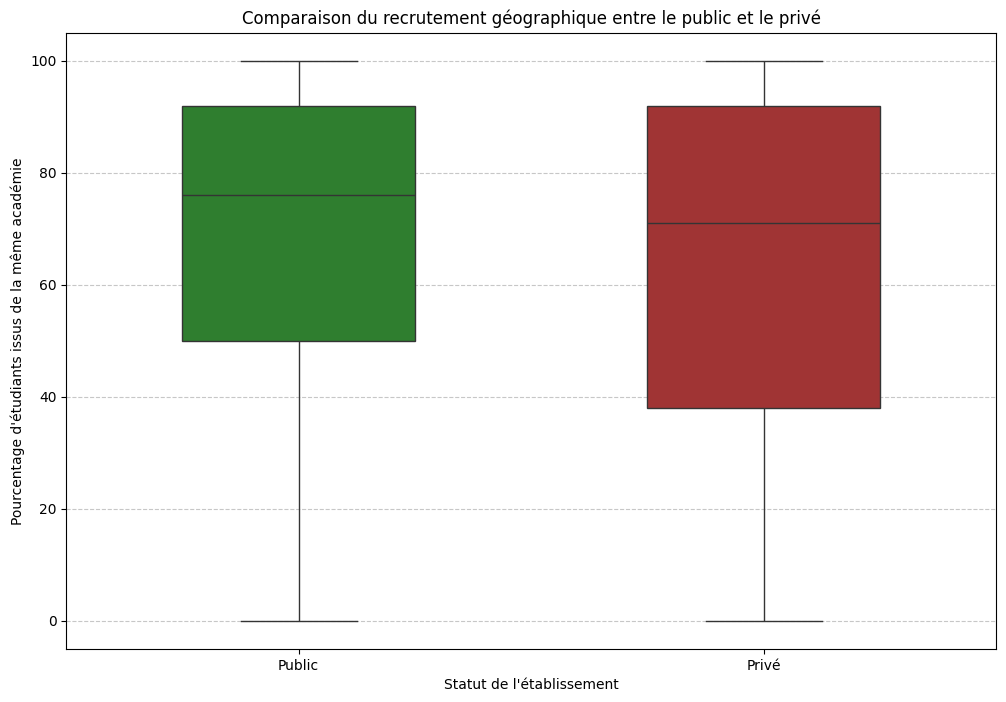

In [15]:
#On ne garde que le public et le privé
statut_filtre = df[df["statut_public_prive"].isin(["Public", "Privé"])]

plt.figure(figsize=(12,8))

sns.boxplot(
    data=statut_filtre,
    x="statut_public_prive",
    y="part_bac_ac",
    palette=["forestgreen","firebrick"],
    width=0.5
)

plt.title("Comparaison du recrutement géographique entre le public et le privé")
plt.xlabel("Statut de l'établissement"),
plt.ylabel("Pourcentage d'étudiants issus de la même académie")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

A commenter

<a id="genre"></a> ### L'influence du genre

/tmp/ipykernel_12426/610834050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


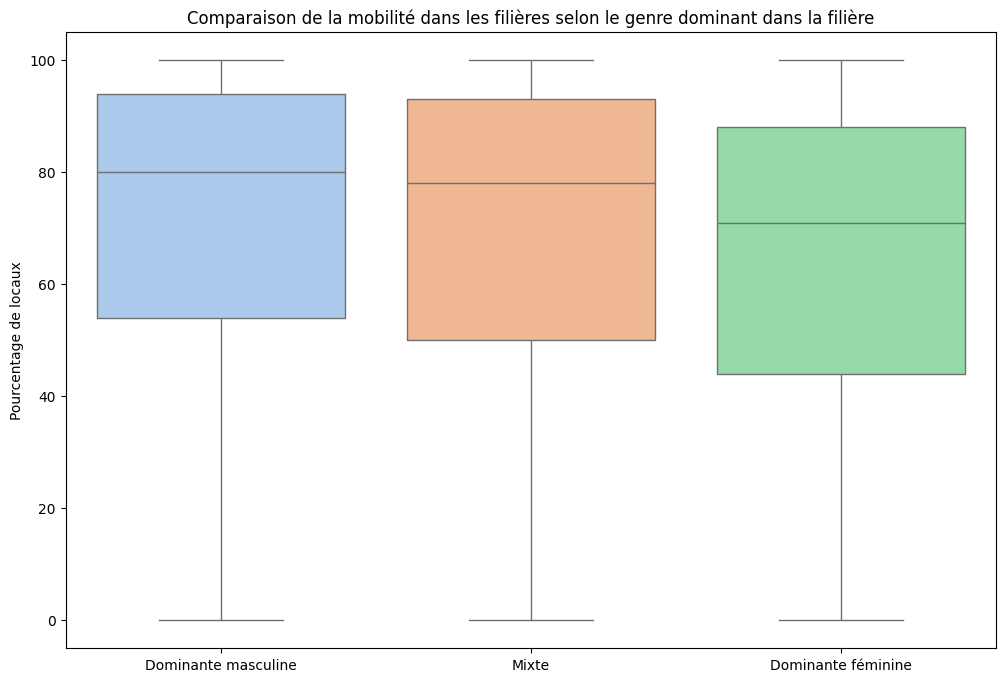

In [16]:
plt.figure(figsize=(12,8))

sns.boxplot(
    data=df,
    x="categorie_genre",
    y="part_bac_ac",
    palette="pastel",
)

plt.title("Comparaison de la mobilité dans les filières selon le genre dominant dans la filière")
plt.xlabel("")
plt.ylabel("Pourcentage de locaux")

plt.show()


A commenter

<a id="selectivite"></a> ### La sélectivité

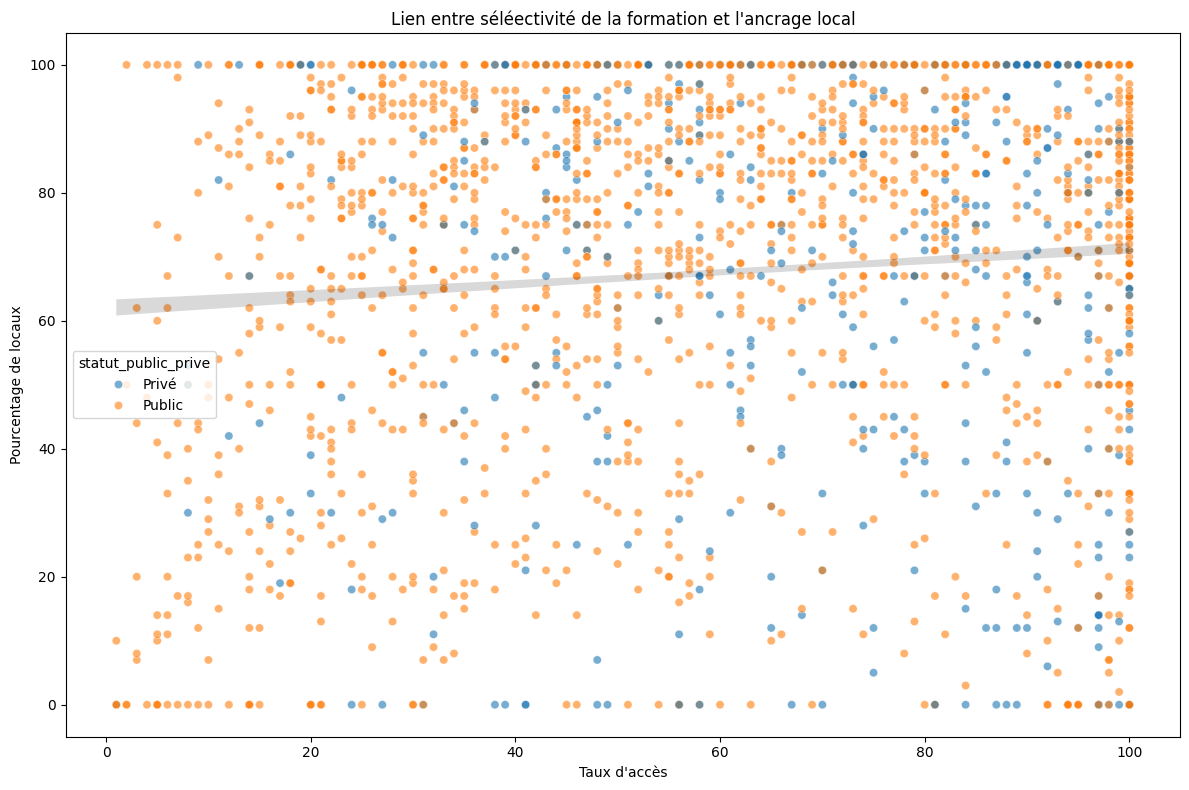

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df.sample(2000, random_state=42),
    x="taux_acces_clean",
    y="part_bac_ac",
    hue="statut_public_prive",
    alpha=0.6
)

sns.regplot(
    data=df,
    x="taux_acces_clean",
    y="part_bac_ac",
    scatter=False,
    color="black",
    line_kws={"linestyle":""}
)

plt.title("Lien entre séléectivité de la formation et l'ancrage local")
plt.xlabel("Taux d'accès")
plt.ylabel("Pourcentage de locaux")

plt.tight_layout()
plt.show()

A commenter

<a id="modelisation"></a> ## Modélisation

On cherche ce qui favorise la mobilité. Pour cela, nous commençons par effectuer des régressions linéaires pour expliquer le taux de mobilité.

On ne montre pour l'instant que des corrélations et non des causalités.